In [20]:
import sys
print(sys.executable)

C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\resume-ml-env\Scripts\python.exe


In [19]:
import os
print(os.path.exists("../data/resume_data.csv"))


True


In [23]:
import os
print(os.path.exists(r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data.csv"))


True


In [24]:
import pandas as pd
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data.csv"
df = pd.read_csv(file_path)
df.head()


,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."
3,4,HR,https://in.linkedin.com/in/hr-hopes-086734b8,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,HR,"Pune Area, India",[],['']
4,5,HR,https://in.linkedin.com/in/rakeshkumar01,https://media-exp1.licdn.com/dms/image/C5103AQ...,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,Vice President - Digital HR Transformation Lea...,"Central Delhi, Delhi, India","['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ..."


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1251 non-null   int64 
 1   category         1251 non-null   object
 2   linkedin         1251 non-null   object
 3   profile_picture  1239 non-null   object
 4   description      670 non-null    object
 5   Experience       1226 non-null   object
 6   Name             1239 non-null   object
 7   position         1239 non-null   object
 8   location         1239 non-null   object
 9   skills           1251 non-null   object
 10  clean_skills     1251 non-null   object
dtypes: int64(1), object(10)
memory usage: 107.6+ KB


In [26]:
print(df.isnull().sum())


index                0
category             0
linkedin             0
profile_picture     12
description        581
Experience          25
Name                12
position            12
location            12
skills               0
clean_skills         0
dtype: int64


In [28]:
print(df.columns)


Index(['index', 'category', 'linkedin', 'profile_picture', 'description',
       'Experience', 'Name', 'position', 'location', 'skills', 'clean_skills'],
      dtype='object')


In [29]:
df = df.drop(columns=['index', 'profile_picture', 'linkedin'])
print(df.head())

  category                                        description  \
0       HR  An experienced HR professional,  HR mentor and...   
1       HR  Head Talent Acquisition, HR Leader and Strateg...   
2       HR  A Talent Acquisition and HR professional with ...   
3       HR                                                NaN   
4       HR  Over 18 Years of experience in IT /ITES  / BPO...   

                                          Experience             Name  \
0  Senior Vice President & Head of HRCompany Name...  Sameer Wadhawan   
1  Head of Talent Acquisition - India & APAC and ...   Adarsh Krishna   
2  Company NameIBM INDIA Pvt LtdTotal Duration8 y...    Shrivas Mohit   
3  HR/Admin/Personnel/LegalCompany NameHR and HR ...         HR Hopes   
4  Company NameEXLTotal Duration6 yrs 4 mosTitleV...     Rakesh Kumar   

                                            position  \
0  Senior Vice President and Head of HR- Samsung ...   
1  Head Talent Acquisition and HR Leader for Heal...   
2 

In [30]:
df = df.fillna("Unknown")
print(df.isnull().sum())  


category        0
description     0
Experience      0
Name            0
position        0
location        0
skills          0
clean_skills    0
dtype: int64


In [31]:
print(df["category"].unique())


['HR' 'Designing' 'Managment' 'Information Technology' 'Education'
 'Advocate' 'Business Development' 'Health & Fitness' 'Agricultural' 'BPO'
 'Sales' 'Consultant' 'Digital Media' 'Building & Construction'
 'Automobile' 'Banking' 'Engineering' 'Food & Beverages' 'Finance'
 'Apparel' 'Accountant' 'Architects' 'Public Relations' 'Arts' 'Aviation']


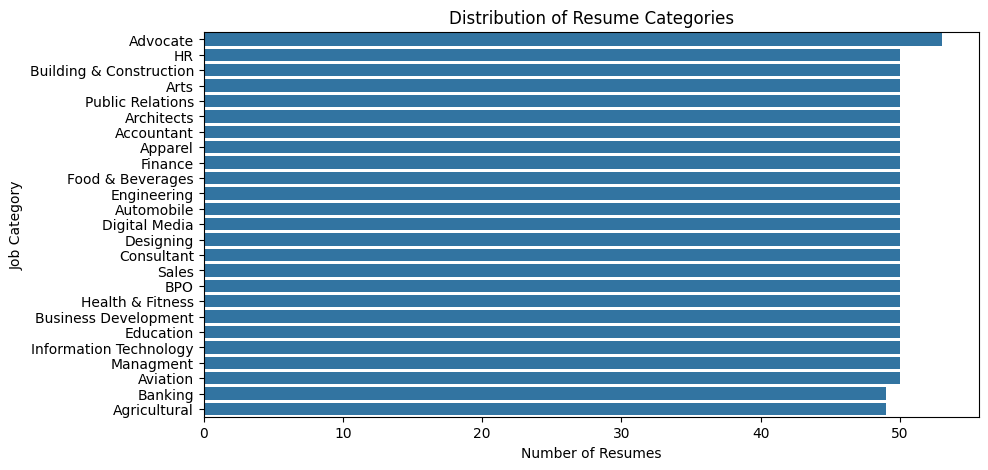

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of resumes per job category
plt.figure(figsize=(10, 5))
sns.countplot(y=df["category"], order=df["category"].value_counts().index)
plt.xlabel("Number of Resumes")
plt.ylabel("Job Category")
plt.title("Distribution of Resume Categories")
plt.show()


In [34]:
df["description_length"] = df["description"].apply(lambda x: len(x) if x != "Unknown" else 0)
df[["category", "description_length"]].groupby("category").mean()

,description_length
category,
Accountant,87.480000
Advocate,130.886792
Agricultural,118.714286
Apparel,54.480000
Architects,73.440000
Arts,63.120000
Automobile,44.580000
Aviation,69.240000
BPO,51.980000


In [35]:
df.to_csv("../data/resume_data_cleaned.csv", index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [4]:
import re

# Function to clean text further
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to the "description" column
df["clean_description"] = df["description"].apply(clean_text)

# Show cleaned text examples
df[["description", "clean_description"]].head()

,description,clean_description
0,"An experienced HR professional, HR mentor and...",an experienced hr professional hr mentor and c...
1,"Head Talent Acquisition, HR Leader and Strateg...",head talent acquisition hr leader and strategi...
2,A Talent Acquisition and HR professional with ...,a talent acquisition and hr professional with ...
3,Unknown,unknown
4,Over 18 Years of experience in IT /ITES / BPO...,over years of experience in it ites bpo with l...


In [3]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data_cleaned.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Show first few rows to confirm it's loaded
df.head()


,category,description,Experience,Name,position,location,skills,clean_skills,description_length
0,HR,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ...",100
1,HR,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ...",211
2,HR,A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage...",312
3,HR,Unknown,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,HR,"Pune Area, India",[],[''],0
4,HR,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,Vice President - Digital HR Transformation Lea...,"Central Delhi, Delhi, India","['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ...",208


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Convert cleaned text into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Show shape of transformed data
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (1251, 4088)


In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target labels (y)
y = df["category"]  # Job category is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1000, 4088)
Testing data shape: (251, 4088)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Show detailed classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.25
                         precision    recall  f1-score   support

             Accountant       1.00      0.40      0.57        10
               Advocate       1.00      0.31      0.47        13
           Agricultural       1.00      0.09      0.17        11
                Apparel       0.00      0.00      0.00        10
             Architects       0.33      0.10      0.15        10
                   Arts       0.00      0.00      0.00        12
             Automobile       0.00      0.00      0.00         5
               Aviation       0.00      0.00      0.00         8
                    BPO       0.04      0.62      0.08         8
                Banking       0.50      0.08      0.14        12
Building & Construction       1.00      0.13      0.24        15
   Business Development       0.33      0.50      0.40        10
             Consultant       0.19      0.40      0.26        10
              Designing       0.00      0.00      0.00        12
         

C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\resume-ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\resume-ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\resume-ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Convert cleaned descriptions into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Show the shape of transformed data
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (1251, 4088)


In [10]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the first 20 important words
print(feature_names[:20])

['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'abilities' 'ability' 'abilityto'
 'able' 'aboutnational' 'abridging' 'abroad' 'absolute'
 'absorptionspectroscopy' 'academia' 'academic' 'academics' 'academy'
 'acb' 'accept']


In [11]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = " ".join([word for word in text.split() if len(word) > 2])  # Remove short words
    return text

# Apply cleaning function to text data
df["clean_description"] = df["description"].apply(clean_text)

# Check cleaned data
print(df["clean_description"].head())

0    experienced professional mentor and coach tale...
1    head talent acquisition leader and strategic p...
2    talent acquisition and professional with exper...
3                                              unknown
4    over years experience ites bpo with leading gl...
Name: clean_description, dtype: object


In [12]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'abilities' 'ability' 'abilityto'
 'able' 'aboutnational' 'abridging' 'abroad' 'absolute'
 'absorptionspectroscopy' 'academia' 'academic' 'academics' 'academy'
 'acb' 'accept']


In [13]:
custom_stop_words = [
    "abilities", "ability", "about", "academic", "acb", "accept", "abilityto"
]  # Add more stopwords if needed

vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=5000)
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'able' 'aboutnational' 'above'
 'abridging' 'abroad' 'absolute' 'absorptionspectroscopy' 'academia'
 'academics' 'academy' 'access' 'accessories' 'accompanied' 'accomplish'
 'accomplished']


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'abilities' 'ability' 'abilityto'
 'able' 'aboutnational' 'abridging' 'abroad' 'absolute'
 'absorptionspectroscopy' 'academia' 'academic' 'academics' 'academy'
 'acb' 'accept']


In [15]:
print(df["clean_description"].head())


0    experienced professional mentor and coach tale...
1    head talent acquisition leader and strategic p...
2    talent acquisition and professional with exper...
3                                              unknown
4    over years experience ites bpo with leading gl...
Name: clean_description, dtype: object


In [16]:
print(df["clean_description"].head(10))  # Show first 10 rows


0    experienced professional mentor and coach tale...
1    head talent acquisition leader and strategic p...
2    talent acquisition and professional with exper...
3                                              unknown
4    over years experience ites bpo with leading gl...
5    human resources business partner with demonstr...
6    seasoned professional and experienced banker w...
7    have been working practitioner for the past ye...
8    passionate developing people and building comp...
9    performance driven and accomplished profession...
Name: clean_description, dtype: object


In [17]:
import re

def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if len(word) > 3]  # Remove words shorter than 4 letters
    return " ".join(words)  # Join cleaned words back

# Apply cleaning function to a small sample of text
sample_text = df["description"].iloc[0]  # Pick first resume text

print("Original Text:\n", sample_text)
print("\nCleaned Text:\n", clean_text(sample_text))

Original Text:
 An experienced HR professional,  HR mentor and Coach , Talent advisory and HR strategist... see more

Cleaned Text:
 experienced professional mentor coach talent advisory strategist more


In [18]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if len(word) > 3 and word not in stop_words]  # Remove short words & stopwords
    return " ".join(words)  # Join cleaned words back

# Apply improved cleaning function to the first resume text
print("Original Text:\n", df["description"].iloc[0])
print("\nCleaned Text:\n", clean_text(df["description"].iloc[0]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Original Text:
 An experienced HR professional,  HR mentor and Coach , Talent advisory and HR strategist... see more

Cleaned Text:
 experienced professional mentor coach talent advisory strategist


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Convert cleaned descriptions into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print first 20 TF-IDF feature words
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])  # Check the first 20 words

['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'abilities' 'ability' 'abilityto'
 'able' 'aboutnational' 'abridging' 'abroad' 'absolute'
 'absorptionspectroscopy' 'academia' 'academic' 'academics' 'academy'
 'acb' 'accept']


In [20]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'abilities' 'ability' 'abilityto'
 'able' 'aboutnational' 'abridging' 'abroad' 'absolute'
 'absorptionspectroscopy' 'academia' 'academic' 'academics' 'academy'
 'acb' 'accept']


In [21]:
print(df["clean_description"].head(20))


0     experienced professional mentor and coach tale...
1     head talent acquisition leader and strategic p...
2     talent acquisition and professional with exper...
3                                               unknown
4     over years experience ites bpo with leading gl...
5     human resources business partner with demonstr...
6     seasoned professional and experienced banker w...
7     have been working practitioner for the past ye...
8     passionate developing people and building comp...
9     performance driven and accomplished profession...
10                                              unknown
11    administration coordinating handling operation...
12                                              unknown
13    experienced head rewards and operations with d...
14    over years progressive experience domain acros...
15    professional with years experience business pa...
16                                              unknown
17    recruitment professional years work experi

In [22]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['_avp' 'aarti' 'aas' 'aat' 'abhijeet' 'abilities' 'ability' 'abilityto'
 'able' 'aboutnational' 'abridging' 'abroad' 'absolute'
 'absorptionspectroscopy' 'academia' 'academic' 'academics' 'academy'
 'acb' 'accept']


In [23]:
import pandas as pd

# Reload original dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data.csv"
df = pd.read_csv(file_path)

# Show first 5 rows to confirm it's reset
print(df.head())


   index category                                           linkedin  \
0      1       HR  https://in.linkedin.com/in/sameer-wadhawan-b55...   
1      2       HR  https://in.linkedin.com/in/adarsh-krishna-a4ab0a5   
2      3       HR           https://in.linkedin.com/in/shrivas-mohit   
3      4       HR       https://in.linkedin.com/in/hr-hopes-086734b8   
4      5       HR           https://in.linkedin.com/in/rakeshkumar01   

                                     profile_picture  \
0  https://media-exp1.licdn.com/dms/image/C5603AQ...   
1  https://media-exp1.licdn.com/dms/image/C5103AQ...   
2  data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...   
3  data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...   
4  https://media-exp1.licdn.com/dms/image/C5103AQ...   

                                         description  \
0  An experienced HR professional,  HR mentor and...   
1  Head Talent Acquisition, HR Leader and Strateg...   
2  A Talent Acquisition and HR professional with ...   
3     

In [24]:
print(df.info())  # Check columns & data types
print(df.isnull().sum())  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1251 non-null   int64 
 1   category         1251 non-null   object
 2   linkedin         1251 non-null   object
 3   profile_picture  1239 non-null   object
 4   description      670 non-null    object
 5   Experience       1226 non-null   object
 6   Name             1239 non-null   object
 7   position         1239 non-null   object
 8   location         1239 non-null   object
 9   skills           1251 non-null   object
 10  clean_skills     1251 non-null   object
dtypes: int64(1), object(10)
memory usage: 107.6+ KB
None
index                0
category             0
linkedin             0
profile_picture     12
description        581
Experience          25
Name                12
position            12
location            12
skills               0
clean_skills        

In [25]:
df["clean_description"] = df["description"].str.lower()
print(df["clean_description"].head(5))

0    an experienced hr professional,  hr mentor and...
1    head talent acquisition, hr leader and strateg...
2    a talent acquisition and hr professional with ...
3                                                  NaN
4    over 18 years of experience in it /ites  / bpo...
Name: clean_description, dtype: object


In [26]:
import re

def remove_punctuations_numbers(text):
    return re.sub(r"[^a-z\s]", "", text)  # Keep only letters & spaces

df["clean_description"] = df["clean_description"].apply(remove_punctuations_numbers)
print(df["clean_description"].head(5))


TypeError: expected string or bytes-like object, got 'float'

In [27]:
import re

def remove_punctuations_numbers(text):
    if not isinstance(text, str):  # If text is NaN or not a string, convert it
        return ""
    return re.sub(r"[^a-z\s]", "", text)  # Keep only letters & spaces

df["clean_description"] = df["clean_description"].apply(remove_punctuations_numbers)
print(df["clean_description"].head(5))


0    an experienced hr professional  hr mentor and ...
1    head talent acquisition hr leader and strategi...
2    a talent acquisition and hr professional with ...
3                                                     
4    over  years of experience in it ites   bpo wit...
Name: clean_description, dtype: object


In [28]:
print(df["clean_description"].head(10))


0    an experienced hr professional  hr mentor and ...
1    head talent acquisition hr leader and strategi...
2    a talent acquisition and hr professional with ...
3                                                     
4    over  years of experience in it ites   bpo wit...
5    human resources business partner with a demons...
6    a seasoned hr professional and an experienced ...
7    i have been working as an hr practitioner for ...
8    passionate in developing people and building c...
9    performance driven and accomplished profession...
Name: clean_description, dtype: object


In [31]:
print(df["clean_description"].isnull().sum())  # Check for NaN (missing) values
print((df["clean_description"] == "").sum())  # Count fully empty rows


0
0


In [30]:
df = df[df["clean_description"] != ""]


In [32]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply improved cleaning function
df["clean_description"] = df["description"].apply(clean_text)

# Check results
print(df["clean_description"].head(10))

0     experienced professional mentor coach talent a...
1     head talent acquisition leader strategic partn...
2     talent acquisition professional experience soc...
4     years experience ites leading global organizat...
5     human resources business partner demonstrated ...
6     seasoned professional experienced banker years...
7     working practitioner past years attract engage...
8     passionate developing people building competen...
9     performance driven accomplished professional c...
11    administration coordinating handling operation...
Name: clean_description, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
print(df["clean_description"].isnull().sum())  # Check for missing values
print((df["clean_description"] == "").sum())  # Check for fully empty rows


0
0


In [34]:
df = df[df["clean_description"] != ""]  # Remove fully empty rows
df = df.dropna(subset=["clean_description"])  # Remove NaN values


In [36]:
df.to_csv("../data/resume_data_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [37]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [39]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Convert cleaned descriptions into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print the shape of transformed data
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (668, 3585)


In [40]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the first 20 important words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])

Top 20 Words in TF-IDF Feature List:
 ['_avp' 'aarti' 'abhijeet' 'abilities' 'ability' 'abilityto' 'able'
 'aboutnational' 'abridging' 'abroad' 'absolute' 'absorptionspectroscopy'
 'academia' 'academic' 'academics' 'academy' 'accept' 'access'
 'accessories' 'accompanied']


In [41]:
import pandas as pd

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Print first resume vector
print(tfidf_df.iloc[0])

_avp         0.0
aarti        0.0
abhijeet     0.0
abilities    0.0
ability      0.0
            ... 
youtube      0.0
yuva         0.0
zealand      0.0
zettler      0.0
zone         0.0
Name: 0, Length: 3585, dtype: float64


In [42]:
print(df["clean_description"].head(20))  # Show first 20 cleaned resumes


0     experienced professional mentor coach talent a...
1     head talent acquisition leader strategic partn...
2     talent acquisition professional experience soc...
4     years experience ites leading global organizat...
5     human resources business partner demonstrated ...
6     seasoned professional experienced banker years...
7     working practitioner past years attract engage...
8     passionate developing people building competen...
9     performance driven accomplished professional c...
11    administration coordinating handling operation...
13    experienced head rewards operations demonstrat...
14    years progressive experience domain across div...
15    professional years experience business partner...
17       recruitment professional years work experience
20    proficient hrms implementation administration ...
21    dynamic executive years comprehensive experien...
22    analytics modeling expert business partner dat...
25    experienced human resource capital managem

In [43]:
vectorizer = TfidfVectorizer(
    stop_words="english", 
    max_features=3000,  # Reduce number of words
    min_df=5,  # Ignore words that appear in fewer than 5 resumes
    max_df=0.9  # Ignore words that appear in more than 90% of resumes (too common)
)

# Reapply TF-IDF transformation
X = vectorizer.fit_transform(df["clean_description"])

# Print top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])

Top 20 Words in TF-IDF Feature List:
 ['ability' 'able' 'academy' 'accomplished' 'account' 'accountant'
 'accounting' 'accounts' 'achieve' 'achieved' 'acquisition' 'active'
 'activities' 'administration' 'advertising' 'advisor' 'advisory'
 'advocate' 'affairs' 'agencies']


In [44]:
custom_stop_words = ["_avp", "aarti", "abhijeet", "zettler", "yuva", "zone"]

vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,  
    max_features=3000,
    min_df=5,  
    max_df=0.9
)

X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])

Top 20 Words in TF-IDF Feature List:
 ['ability' 'able' 'academy' 'accomplished' 'account' 'accountant'
 'accounting' 'accounts' 'achieve' 'achieved' 'acquisition' 'across'
 'active' 'activities' 'administration' 'advertising' 'advisor' 'advisory'
 'advocate' 'affairs']


In [45]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['ability' 'able' 'academy' 'accomplished' 'account' 'accountant'
 'accounting' 'accounts' 'achieve' 'achieved' 'acquisition' 'across'
 'active' 'activities' 'administration' 'advertising' 'advisor' 'advisory'
 'advocate' 'affairs']


In [46]:
custom_stop_words = [
    "ability", "able", "across", "activities", "achieve", "achieved"
]

vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,  
    max_features=3000,
    min_df=5,  
    max_df=0.9
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()

# Check top words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['academy' 'accomplished' 'account' 'accountant' 'accounting' 'accounts'
 'acquisition' 'active' 'administration' 'advertising' 'advisor'
 'advisory' 'advocate' 'affairs' 'agencies' 'agency' 'agricultural'
 'agriculture' 'airlines' 'also']


In [47]:
custom_stop_words = [
    "academy", "accomplished", "active", "affairs", "agencies",
    "agency", "agricultural", "agriculture", "airlines", "also"
]

vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,  
    max_features=3000,
    min_df=5,  
    max_df=0.9
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()

# Check top words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['ability' 'able' 'account' 'accountant' 'accounting' 'accounts' 'achieve'
 'achieved' 'acquisition' 'across' 'activities' 'administration'
 'advertising' 'advisor' 'advisory' 'advocate' 'always' 'analysis'
 'analytical' 'analytics']


In [48]:
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english")).union(custom_stop_words)

# Print first 30 words before TF-IDF to confirm stopwords are applied
print("Words before TF-IDF:\n", df["clean_description"].iloc[0].split()[:30])

Words before TF-IDF:
 ['experienced', 'professional', 'mentor', 'coach', 'talent', 'advisory', 'strategist']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english")).union(set([
    "experienced", "professional", "mentor", "coach", "strategist", "advisory",
    "expertise", "specialist", "career", "success", "background", "certified",
    "ability", "proven", "passionate", "dedicated", "hardworking", "teamwork"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply improved cleaning function
df["clean_description"] = df["description"].apply(clean_text)

# Check if generic words are removed before TF-IDF
print("Words in first resume after stopword removal:", df["clean_description"].iloc[0].split())

Words in first resume after stopword removal: ['talent']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000, min_df=5, max_df=0.9)
X = vectorizer.fit_transform(df["clean_description"])

# Check top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['able' 'academy' 'accomplished' 'account' 'accountant' 'accounting'
 'accounts' 'achieve' 'achieved' 'acquisition' 'active' 'activities'
 'administration' 'advertising' 'advisor' 'advocate' 'affairs' 'agencies'
 'agency' 'agricultural']


In [51]:
custom_stop_words = [
    "able", "academy", "accomplished", "active", "activities",
    "administration", "affairs", "agencies", "agency", "agricultural",
    "achieve", "achieved", "account", "advertising", "advisor",
    "advocate"
]

vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,
    max_features=3000,
    min_df=5,
    max_df=0.9
)

# Reapply TF-IDF transformation
X = vectorizer.fit_transform(df["clean_description"])

# Print top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accountant' 'accounting' 'accounts' 'acquisition' 'across' 'agriculture'
 'airlines' 'also' 'always' 'analysis' 'analytical' 'analytics' 'apparel'
 'applications' 'approach' 'architect' 'architects' 'architecture' 'area'
 'areas']


In [52]:
print("Words in first resume after stopword removal:", df["clean_description"].iloc[0].split()[:30])


Words in first resume after stopword removal: ['talent']


In [53]:
X = vectorizer.fit_transform(df["clean_description"])

# Check top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])

Top 20 Words in TF-IDF Feature List:
 ['accountant' 'accounting' 'accounts' 'acquisition' 'across' 'agriculture'
 'airlines' 'also' 'always' 'analysis' 'analytical' 'analytics' 'apparel'
 'applications' 'approach' 'architect' 'architects' 'architecture' 'area'
 'areas']


In [54]:
import pandas as pd

# Reload the original dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data.csv"
df = pd.read_csv(file_path)

# Show first few rows to confirm it's reset
print(df.head())

   index category                                           linkedin  \
0      1       HR  https://in.linkedin.com/in/sameer-wadhawan-b55...   
1      2       HR  https://in.linkedin.com/in/adarsh-krishna-a4ab0a5   
2      3       HR           https://in.linkedin.com/in/shrivas-mohit   
3      4       HR       https://in.linkedin.com/in/hr-hopes-086734b8   
4      5       HR           https://in.linkedin.com/in/rakeshkumar01   

                                     profile_picture  \
0  https://media-exp1.licdn.com/dms/image/C5603AQ...   
1  https://media-exp1.licdn.com/dms/image/C5103AQ...   
2  data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...   
3  data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...   
4  https://media-exp1.licdn.com/dms/image/C5103AQ...   

                                         description  \
0  An experienced HR professional,  HR mentor and...   
1  Head Talent Acquisition, HR Leader and Strateg...   
2  A Talent Acquisition and HR professional with ...   
3     

In [55]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english")).union(set([
    "experienced", "professional", "mentor", "coach", "strategist", "advisory",
    "expertise", "specialist", "career", "success", "background", "certified",
    "ability", "proven", "passionate", "dedicated", "hardworking", "teamwork"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply cleaning function
df["clean_description"] = df["description"].apply(clean_text)

# Print cleaned descriptions before TF-IDF
print("Words in first resume after cleaning:", df["clean_description"].iloc[0].split())

Words in first resume after cleaning: ['talent']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",  
    max_features=3000,
    min_df=10,  # Ignore words that appear in fewer than 10 resumes
    max_df=0.9  # Ignore words that appear in more than 90% of resumes
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])
feature_names = vectorizer.get_feature_names_out()

# Print top words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['account' 'accounting' 'acquisition' 'administration' 'agency' 'analysis'
 'analytics' 'approach' 'architecture' 'areas' 'arts' 'automobile'
 'aviation' 'bachelor' 'banking' 'based' 'believe' 'best' 'beverage'
 'brand']


In [57]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['account' 'accounting' 'acquisition' 'administration' 'agency' 'analysis'
 'analytics' 'approach' 'architecture' 'areas' 'arts' 'automobile'
 'aviation' 'bachelor' 'banking' 'based' 'believe' 'best' 'beverage'
 'brand']


In [58]:
import pandas as pd

# Load the new dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\Resume.csv"
df = pd.read_csv(file_path)

# Show the first few rows
print(df.head())


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [59]:
print(df.columns)


Index(['Category', 'Resume'], dtype='object')


In [60]:
import pandas as pd

# Load the new dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\Resume.csv"
df = pd.read_csv(file_path)

# Show first few rows
print(df.head())

# Show dataset structure (columns, data types, missing values)
print(df.info())

# Show column names
print("Columns in dataset:", df.columns)


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None
Columns in dataset: Index(['Category', 'Resume'], dtype='object')


In [61]:
print(df.columns)


Index(['Category', 'Resume'], dtype='object')


In [62]:
df.rename(columns={"Resume": "clean_description", "Category": "category"}, inplace=True)
print(df.head())


       category                                  clean_description
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [63]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english")).union(set([
    "experienced", "professional", "mentor", "coach", "strategist", "advisory",
    "expertise", "specialist", "career", "success", "background", "certified",
    "ability", "proven", "passionate", "dedicated", "hardworking", "teamwork"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply cleaning function
df["clean_description"] = df["Resume"].apply(clean_text)

# Show first cleaned resumes
print(df["clean_description"].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'Resume'

In [64]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['category', 'clean_description'], dtype='object')


In [65]:
df.rename(columns={"actual_column_name": "Resume"}, inplace=True)
print("Updated Columns:", df.columns)


Updated Columns: Index(['category', 'clean_description'], dtype='object')


In [66]:
print(df.head())  # Show first few rows
print(df.info())  # Show data types and missing values


       category                                  clean_description
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           962 non-null    object
 1   clean_description  962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [67]:
df["clean_description"] = df["Resume"].astype(str).apply(clean_text)


KeyError: 'Resume'

In [68]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['category', 'clean_description'], dtype='object')


In [70]:
df["clean_description"] = df["clean_description"].astype(str).apply(clean_text)


In [71]:
print(df["clean_description"].head(10))


0    skills programming languages python pandas num...
1    education details rgpv data scientist data sci...
2    areas interest deep learning control system de...
3    skills python hana tableau hana hana lumira li...
4    education details ymcaust faridabad haryana da...
5    skills basics python matlab data science machi...
6    skills python tableau data visualization studi...
7    education details tech rayat bahra institute e...
8    personal skills quickly grasp technical aspect...
9    data quantitative analysis decision analytics ...
Name: clean_description, dtype: object


In [72]:
df.to_csv(r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [73]:
import pandas as pd

# Load the cleaned dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resume_data_cleaned.csv"
df = pd.read_csv(file_path)

# Show first few rows
print(df.head())


       category                                  clean_description
0  Data Science  skills programming languages python pandas num...
1  Data Science  education details rgpv data scientist data sci...
2  Data Science  areas interest deep learning control system de...
3  Data Science  skills python hana tableau hana hana lumira li...
4  Data Science  education details ymcaust faridabad haryana da...


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    stop_words="english",  # Removes common words (e.g., "the", "is", "and")
    max_features=3000,  # Keep only the top 3000 most important words
    min_df=10,  # Ignore words that appear in fewer than 10 resumes
    max_df=0.9  # Ignore words that appear in more than 90% of resumes (too common)
)

# Convert cleaned resumes into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print the shape of transformed data
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (962, 3000)


In [75]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the first 20 important words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['abacus' 'abilities' 'able' 'abridged' 'absence' 'academic' 'academy'
 'accenture' 'accept' 'acceptance' 'accepted' 'accepting' 'access'
 'accesses' 'accessories' 'accordance' 'according' 'accordingly' 'account'
 'accountability']


In [76]:
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split())


Words in first cleaned resume: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'neural', 'nets', 'database', 'visualizations', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'angular', 'logstash', 'kafka', 'python', 'flask', 'docker', 'computer', 'vision', 'open', 'understanding', 'deep', 'learning', 'education', 'details', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'skill', 'details', 'javascript', 'exprience', 'months', 'jquery', 'exprience', 'months'

In [77]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english")).union(set([
    "abilities", "able", "academic", "academy", "accenture", "access",
    "account", "accept", "acceptance", "accepted", "abridged",
    "absence", "accessories", "accordance", "according", "accordingly"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Reapply cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Verify cleaning worked before TF-IDF
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned resume: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'neural', 'nets', 'database', 'visualizations', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'angular', 'logstash', 'kafka', 'python', 'flask', 'docker', 'computer', 'vision', 'open', 'understanding', 'deep', 'learning', 'education', 'details', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'skill', 'details', 'javascript', 'exprience', 'months', 'jquery', 'exprience', 'months'

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=3000,
    min_df=15,  # Ignore words appearing in fewer than 15 resumes
    max_df=0.85  # Ignore words appearing in more than 85% of resumes
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accounting' 'accounts' 'accuracy' 'accurate' 'accurately' 'achieve'
 'achieved' 'achievements' 'achieving' 'acquired' 'acquiring' 'action'
 'actions' 'active' 'actively' 'activities' 'activity' 'actual' 'actuator'
 'actuators']


In [79]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accounting' 'accounts' 'accuracy' 'accurate' 'accurately' 'achieve'
 'achieved' 'achievements' 'achieving' 'acquired' 'acquiring' 'action'
 'actions' 'active' 'actively' 'activities' 'activity' 'actual' 'actuator'
 'actuators']


In [80]:
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


Words in first cleaned resume: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural']


In [81]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "accounting", "accounts", "accuracy", "accurate", "achieve", "achieved",
    "achievements", "acquired", "action", "actions", "active", "actively",
    "activities", "activity", "actual", "administration", "advisor"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Verify stopwords were removed
print("Words in first cleaned resume after stopword removal:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned resume after stopword removal: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural']


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=3000,
    min_df=20,  # Ignore words appearing in fewer than 20 resumes
    max_df=0.85  # Ignore words appearing in more than 85% of resumes
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accurately' 'achieving' 'actuators' 'added' 'adding' 'additional'
 'address' 'addressed' 'adherence' 'admin' 'administrative'
 'administrator' 'advance' 'advanced' 'advertising' 'advocate' 'agents'
 'agile' 'ajax' 'alarm']


In [83]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accurately' 'achieving' 'actuators' 'added' 'adding' 'additional'
 'address' 'addressed' 'adherence' 'admin' 'administrative'
 'administrator' 'advance' 'advanced' 'advertising' 'advocate' 'agents'
 'agile' 'ajax' 'alarm']


In [84]:
import numpy as np

# Get TF-IDF values for all words
word_tfidf_values = np.asarray(X.mean(axis=0)).flatten()

# Pair words with their TF-IDF importance
word_tfidf_pairs = list(zip(vectorizer.get_feature_names_out(), word_tfidf_values))

# Sort words by importance (highest first)
word_tfidf_pairs = sorted(word_tfidf_pairs, key=lambda x: x[1], reverse=True)

# Print top 20 most important words
print("Top 20 Most Important Words in TF-IDF:\n", word_tfidf_pairs[:20])


Top 20 Most Important Words in TF-IDF:
 [('exprience', np.float64(0.08799129665033294)), ('months', np.float64(0.07863752546699765)), ('project', np.float64(0.061287807535098195)), ('java', np.float64(0.04948886311595684)), ('year', np.float64(0.048336809545806186)), ('january', np.float64(0.04662000594086879)), ('data', np.float64(0.04611264817153065)), ('developer', np.float64(0.04366994003815385)), ('maharashtra', np.float64(0.04259710222451858)), ('pune', np.float64(0.038483407138450075)), ('management', np.float64(0.03666987618456666)), ('testing', np.float64(0.03597328177028684)), ('engineering', np.float64(0.03435391695576994)), ('team', np.float64(0.0335343025111765)), ('python', np.float64(0.033432491127299464)), ('database', np.float64(0.031625882389743634)), ('test', np.float64(0.02951204577068826)), ('college', np.float64(0.0289010123193091)), ('sales', np.float64(0.028427090239116708)), ('mumbai', np.float64(0.028339779497194274))]


In [85]:
custom_stop_words = set([
    "accurately", "achieving", "added", "additional", "address", "admin",
    "administrative", "administrator", "advance", "advanced", "advertising",
    "advocate", "agents", "alarm", "analysis", "analytic", "apply", "assist"
])

# Re-run TF-IDF with updated stopwords
vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,
    max_features=3000,
    min_df=25,  # Increase to remove even more rare words
    max_df=0.85
)

X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'accurately', 'administrator', 'alarm', 'admin', 'agents', 'added', 'address', 'analysis', 'additional', 'analytic', 'assist', 'apply', 'advance', 'administrative', 'advanced', 'advertising', 'advocate', 'achieving'} instead.

In [86]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accurately' 'achieving' 'actuators' 'added' 'adding' 'additional'
 'address' 'addressed' 'adherence' 'admin' 'administrative'
 'administrator' 'advance' 'advanced' 'advertising' 'advocate' 'agents'
 'agile' 'ajax' 'alarm']


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert stopword set to a list
custom_stop_words = list([
    "accurately", "achieving", "added", "additional", "address", "admin",
    "administrative", "administrator", "advance", "advanced", "advertising",
    "advocate", "agents", "alarm", "analysis", "analytic", "apply", "assist"
])

# Re-run TF-IDF with updated stopwords
vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,  # Now it's a list, not a set
    max_features=3000,
    min_df=25,  # Increase to remove even more rare words
    max_df=0.85
)

X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])

Top 20 Words in TF-IDF Feature List:
 ['across' 'adding' 'agile' 'ajax' 'alert' 'algorithm' 'algorithms' 'along'
 'already' 'also' 'american' 'amravati' 'analyst' 'analysts' 'analytical'
 'analytics' 'analyze' 'analyzed' 'analyzing' 'android']


In [88]:
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


Words in first cleaned resume: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural']


In [89]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "across", "adding", "agile", "ajax", "alert", "already", "also",
    "amravati", "analyst", "analysts", "analytics", "american", "along"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply cleaning function again
df["clean_description"] = df["clean_description"].apply(clean_text)

# Verify cleaned resumes before TF-IDF
print("Words in first cleaned resume after stopword removal:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned resume after stopword removal: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural']


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=2000,  # Reduce vocabulary size further
    min_df=30,  # Ignore words appearing in fewer than 30 resumes
    max_df=0.8,  # Ignore words appearing in more than 80% of resumes
    ngram_range=(1,2)  # Use word pairs (bigrams) to capture context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accurately' 'achieving' 'admin' 'administrative' 'administrator'
 'advance' 'advanced' 'algorithms' 'analysis' 'analytical'
 'analytical skills' 'analyze' 'analyzed' 'analyzing' 'android' 'angular'
 'angular exprience' 'annual' 'apache' 'apache tomcat']


In [91]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accurately' 'achieving' 'admin' 'administrative' 'administrator'
 'advance' 'advanced' 'algorithms' 'analysis' 'analytical'
 'analytical skills' 'analyze' 'analyzed' 'analyzing' 'android' 'angular'
 'angular exprience' 'annual' 'apache' 'apache tomcat']


In [92]:
print("Words in first cleaned resume before TF-IDF:", df["clean_description"].iloc[0].split()[:30])


Words in first cleaned resume before TF-IDF: ['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural']


In [93]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "accurately", "achieving", "admin", "administrative", "administrator",
    "advance", "advanced", "annual", "apply", "assist", "experience",
    "knowledge", "skills", "ability", "responsible", "manage", "working",
    "maintain", "ensure", "providing", "understanding"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply cleaning function again
df["clean_description"] = df["clean_description"].apply(clean_text)

# Verify stopwords were removed before TF-IDF
print("Words in first cleaned resume after stopword removal:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned resume after stopword removal: ['programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language']


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=1500,  # Reduce vocabulary size further
    min_df=40,  # Ignore words appearing in fewer than 40 resumes
    max_df=0.75,  # Ignore words appearing in more than 75% of resumes
    ngram_range=(1,2)  # Use word pairs (bigrams) to capture better context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['algorithms' 'analysis' 'analytical' 'analyze' 'analyzing' 'android'
 'angular' 'apache' 'application' 'applications' 'applying' 'appropriate'
 'april' 'architect' 'architecture' 'area' 'areas' 'arts' 'assistant'
 'assisting']


In [95]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['algorithms' 'analysis' 'analytical' 'analyze' 'analyzing' 'android'
 'angular' 'apache' 'application' 'applications' 'applying' 'appropriate'
 'april' 'architect' 'architecture' 'area' 'areas' 'arts' 'assistant'
 'assisting']


In [96]:
print("Sample Resume (Cleaned Text):\n", df["clean_description"].iloc[0])
print("\nAnother Sample Resume:\n", df["clean_description"].iloc[1])
print("\nAnother Sample Resume:\n", df["clean_description"].iloc[2])


Sample Resume (Cleaned Text):
 programming languages python pandas numpy scipy scikit learn matplotlib java javascript jquery machine learning regression bayes random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch plotly kibana matplotlib ggplot tableau others regular expression html angular logstash kafka python flask docker computer vision open deep learning education details data science assurance associate data science assurance associate ernst young skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young description fraud investigations dispute services assurance technology assisted review technology assisted review assists accelerating review process generate reports core member team helped developing automated review 

In [97]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "application", "appropriate", "april", "assistant", "areas", "arts",
    "analyze", "analyzing", "architect", "architecture", "apply",
    "responsibilities", "responsible", "working", "experience", "knowledge"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Check if words are properly removed before TF-IDF
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned resume: ['programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'bayes', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language']


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=1000,  # Reduce vocabulary size further
    min_df=50,  # Ignore words appearing in fewer than 50 resumes
    max_df=0.7,  # Ignore words appearing in more than 70% of resumes
    ngram_range=(1,2)  # Use bigrams to improve word context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['analysis' 'analytical' 'angular' 'apache' 'applications' 'applying'
 'area' 'assisting' 'attending' 'attitude' 'audit' 'audits' 'august'
 'auto' 'autocad' 'automated' 'automation' 'available' 'bachelor'
 'bachelor engineering']


In [99]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['analysis' 'analytical' 'angular' 'apache' 'applications' 'applying'
 'area' 'assisting' 'attending' 'attitude' 'audit' 'audits' 'august'
 'auto' 'autocad' 'automated' 'automation' 'available' 'bachelor'
 'bachelor engineering']


In [100]:
import pandas as pd

# Load the new dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resumeV3.csv"
df = pd.read_csv(file_path)

# Show first few rows
print(df.head())

# Show dataset structure
print(df.info())

# Show column names
print("Columns in dataset:", df.columns)


   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB
None
Columns in dataset: Index(['Unnamed: 0', 'Job Ti

In [101]:
print(df.columns)


Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')


In [102]:
df.rename(columns={"actual_resume_column": "clean_description", "job_category_column": "category"}, inplace=True)
print("Updated Columns:", df.columns)


Updated Columns: Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')


In [103]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "experience", "skills", "knowledge", "worked", "expertise", "responsible",
    "ability", "working", "proficient", "development", "team", "projects"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Show cleaned text
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'clean_description'

In [104]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')


In [105]:
df.rename(columns={"actual_resume_column": "clean_description"}, inplace=True)
print("Updated Columns:", df.columns)


Updated Columns: Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')


In [106]:
print(df.head())  # Show first few rows
print(df.info())  # Show data types and missing values


   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB
None


In [107]:
df["clean_description"] = df["clean_description"].astype(str).apply(clean_text)


KeyError: 'clean_description'

In [108]:
print("Dataset Columns:", df.columns.tolist())


Dataset Columns: ['Unnamed: 0', 'Job Title', 'Job Description']


In [109]:
df.rename(columns={"actual_resume_column": "clean_description"}, inplace=True)
print("Updated Columns:", df.columns.tolist())


Updated Columns: ['Unnamed: 0', 'Job Title', 'Job Description']


In [110]:
print(df.head())  # Show first few rows
print(df.info())  # Show data types and missing values


   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB
None


In [111]:
df["clean_description"] = df["clean_description"].astype(str).apply(clean_text)


KeyError: 'clean_description'

In [112]:
print("Dataset Columns:", df.columns.tolist())


Dataset Columns: ['Unnamed: 0', 'Job Title', 'Job Description']


In [113]:
df.rename(columns={"Resume": "clean_description"}, inplace=True)
print("Updated Columns:", df.columns.tolist())


Updated Columns: ['Unnamed: 0', 'Job Title', 'Job Description']


In [114]:
print(df.head())  # Show first few rows
print(df.info())  # Show data types and missing values


   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB
None


In [115]:
df["clean_description"] = df["clean_description"].astype(str).apply(clean_text)


KeyError: 'clean_description'

In [116]:
df.rename(columns={"Job Description": "clean_description", "Job Title": "category"}, inplace=True)

# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

print("Updated Columns:", df.columns.tolist())


Updated Columns: ['category', 'clean_description']


In [117]:
print(df.head())  # Show first few rows
print(df.info())  # Show data types and missing values


               category                                  clean_description
0     Flutter Developer  We are looking for hire experts flutter develo...
1      Django Developer  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2      Machine Learning  Data Scientist (Contractor)\n\nBangalore, IN\n...
3         iOS Developer  JOB DESCRIPTION:\n\nStrong framework outside o...
4  Full Stack Developer  job responsibility full stack engineer – react...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           2277 non-null   object
 1   clean_description  2277 non-null   object
dtypes: object(2)
memory usage: 35.7+ KB
None


In [118]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "experience", "skills", "knowledge", "worked", "expertise", "responsible",
    "ability", "working", "proficient", "development", "team", "projects",
    "hiring", "looking", "job", "description"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Show cleaned text
print("Words in first cleaned job description:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned job description: ['hire', 'experts', 'flutter', 'developer', 'eligible', 'post', 'apply', 'resume', 'types', 'full', 'time', 'part', 'time', 'salary', 'month', 'benefits', 'flexible', 'schedule', 'food', 'allowance', 'schedule', 'shift', 'supplemental', 'joining', 'bonus', 'overtime', 'total', 'work', 'year', 'preferred']


In [119]:
df.to_csv(r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resumeV3_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=2000,  # Reduce vocabulary size
    min_df=50,  # Ignore words appearing in fewer than 50 resumes
    max_df=0.7,  # Ignore words appearing in more than 70% of resumes
    ngram_range=(1,2)  # Use bigrams for better context
)

# Convert cleaned job descriptions into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print the shape of transformed data
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (2277, 1448)


In [121]:
feature_names = vectorizer.get_feature_names_out()

# Print the first 20 important words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['abilities' 'able' 'able work' 'access' 'accessibility'
 'accessibility security' 'accommodation' 'according' 'account' 'accurate'
 'achieve' 'action' 'active' 'actively' 'activities' 'activity' 'adapt'
 'added' 'added advantage' 'addition']


In [122]:
print("Sample Job Description (Cleaned Text):\n", df["clean_description"].iloc[0])
print("\nAnother Sample:\n", df["clean_description"].iloc[1])
print("\nAnother Sample:\n", df["clean_description"].iloc[2])


Sample Job Description (Cleaned Text):
 hire experts flutter developer eligible post apply resume types full time part time salary month benefits flexible schedule food allowance schedule shift supplemental joining bonus overtime total work year preferred housing rent subsidy industry software work remotely temporarily covid

Another Sample:
 python django developer lead code strong python rest frameworks django flask evaluating improving efficiency programs linux environment effectively handle multiple tasks high level accuracy attention detail good verbal written communication json preferred good automated unit testing using pyunit

Another Sample:
 data scientist contractor bangalore responsibilities capable data scientist join analytics reporting locally india bangalore person responsibilities include research design machine learning deep learning algorithms tackle variety fraud oriented challenges data scientist work closely software engineers program managers deliver products inc

In [123]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "abilities", "able", "access", "accessibility", "account", "accurate",
    "achieve", "action", "active", "activities", "activity", "adapt",
    "added", "advantage", "addition", "applicant", "apply", "appropriate",
    "assigned", "assistant", "collaborate", "communication", "company",
    "competitive", "compliance", "concepts", "consider", "consulting",
    "contribute", "coordinate", "corporate", "criteria", "customer",
    "decision", "department", "demonstrated", "desirable", "detail",
    "developed", "development", "duties", "education", "effective",
    "efficiency", "employees", "ensure", "enhance", "environment",
    "established", "evaluate", "execute", "expected", "experience",
    "familiar", "focus", "function", "future", "gained", "general",
    "goal", "group", "handling", "helping", "identified", "impact",
    "important", "improve", "including", "independently", "individual",
    "information", "initiatives", "interacting", "job", "join", "knowledge",
    "leadership", "maintain", "making", "management", "manager",
    "methodologies", "methods", "multiple", "needs", "offer", "office",
    "opportunity", "organization", "participate", "perform", "performance",
    "planning", "practices", "prepare", "process", "proficiency",
    "program", "project", "providing", "related", "reporting",
    "requirements", "resources", "responsibility", "role", "self",
    "services", "skills", "solutions", "specialized", "strategic",
    "strong", "successful", "support", "system", "team", "technical",
    "technology", "track", "training", "understanding", "various",
    "working", "workplace", "writing"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Check cleaned text again
print("Words in first cleaned job description:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned job description: ['hire', 'experts', 'flutter', 'developer', 'eligible', 'post', 'resume', 'types', 'full', 'time', 'part', 'time', 'salary', 'month', 'benefits', 'flexible', 'schedule', 'food', 'allowance', 'schedule', 'shift', 'supplemental', 'joining', 'bonus', 'overtime', 'total', 'work', 'year', 'preferred', 'housing']


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=1000,  # Reduce vocabulary size further
    min_df=60,  # Ignore words appearing in fewer than 60 job descriptions
    max_df=0.65,  # Ignore words appearing in more than 65% of job descriptions
    ngram_range=(1,2)  # Use bigrams to improve word context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accommodation' 'actively' 'additional' 'address' 'administration'
 'administrator' 'advanced' 'agile' 'agile scrum' 'ajax' 'algorithms'
 'amazing' 'amazon' 'analysis' 'analytical' 'analytical problem'
 'analytics' 'analyze' 'analyzing' 'android']


In [125]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['accommodation' 'actively' 'additional' 'address' 'administration'
 'administrator' 'advanced' 'agile' 'agile scrum' 'ajax' 'algorithms'
 'amazing' 'amazon' 'analysis' 'analytical' 'analytical problem'
 'analytics' 'analyze' 'analyzing' 'android']


In [126]:
print("Sample Job Description (Cleaned Text):\n", df["clean_description"].iloc[0])
print("\nAnother Sample:\n", df["clean_description"].iloc[1])
print("\nAnother Sample:\n", df["clean_description"].iloc[2])


Sample Job Description (Cleaned Text):
 hire experts flutter developer eligible post resume types full time part time salary month benefits flexible schedule food allowance schedule shift supplemental joining bonus overtime total work year preferred housing rent subsidy industry software work remotely temporarily covid

Another Sample:
 python django developer lead code python rest frameworks django flask evaluating improving programs linux effectively handle tasks high level accuracy attention good verbal written json preferred good automated unit testing using pyunit

Another Sample:
 data scientist contractor bangalore responsibilities capable data scientist analytics locally india bangalore person responsibilities include research design machine learning deep learning algorithms tackle variety fraud oriented challenges data scientist work closely software engineers managers deliver products data collection scale analysis exploring different algorithmic approaches model assessment v

In [127]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "accommodation", "actively", "additional", "address", "administration",
    "administrator", "advanced", "amazing", "amazon", "analysis", "analytics",
    "application", "apply", "assistant", "collaborate", "communication",
    "company", "compliance", "customer", "department", "development",
    "duties", "education", "effective", "employees", "ensure", "experience",
    "general", "goal", "handling", "impact", "important", "including",
    "independently", "individual", "information", "initiatives", "job",
    "join", "knowledge", "leadership", "maintain", "making", "management",
    "manager", "needs", "office", "opportunity", "organization",
    "participate", "perform", "performance", "planning", "prepare",
    "process", "project", "providing", "reporting", "requirements",
    "responsibility", "role", "services", "skills", "solutions",
    "successful", "support", "team", "technology", "training", "various",
    "working", "workplace", "writing"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Check cleaned text again
print("Words in first cleaned job description:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned job description: ['hire', 'experts', 'flutter', 'developer', 'eligible', 'post', 'resume', 'types', 'full', 'time', 'part', 'time', 'salary', 'month', 'benefits', 'flexible', 'schedule', 'food', 'allowance', 'schedule', 'shift', 'supplemental', 'joining', 'bonus', 'overtime', 'total', 'work', 'year', 'preferred', 'housing']


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=800,  # Reduce vocabulary size even further
    min_df=75,  # Ignore words appearing in fewer than 75 job descriptions
    max_df=0.6,  # Ignore words appearing in more than 60% of job descriptions
    ngram_range=(1,2)  # Use bigrams to improve word context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['agile' 'ajax' 'algorithms' 'analytical' 'analytical problem' 'analyze'
 'android' 'angular' 'angularjs' 'ansible' 'apache' 'apis' 'applicable'
 'applicants' 'applications' 'applications using' 'applying' 'approach'
 'apps' 'architect']


In [129]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['agile' 'ajax' 'algorithms' 'analytical' 'analytical problem' 'analyze'
 'android' 'angular' 'angularjs' 'ansible' 'apache' 'apis' 'applicable'
 'applicants' 'applications' 'applications using' 'applying' 'approach'
 'apps' 'architect']


In [130]:
print("Sample Cleaned Job Description:\n", df["clean_description"].iloc[0])
print("\nAnother Sample:\n", df["clean_description"].iloc[1])
print("\nAnother Sample:\n", df["clean_description"].iloc[2])


Sample Cleaned Job Description:
 hire experts flutter developer eligible post resume types full time part time salary month benefits flexible schedule food allowance schedule shift supplemental joining bonus overtime total work year preferred housing rent subsidy industry software work remotely temporarily covid

Another Sample:
 python django developer lead code python rest frameworks django flask evaluating improving programs linux effectively handle tasks high level accuracy attention good verbal written json preferred good automated unit testing using pyunit

Another Sample:
 data scientist contractor bangalore responsibilities capable data scientist locally india bangalore person responsibilities include research design machine learning deep learning algorithms tackle variety fraud oriented challenges data scientist work closely software engineers managers deliver products data collection scale exploring different algorithmic approaches model assessment validation production quali

In [131]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "ability", "able", "about", "across", "action", "activities", "added",
    "additional", "address", "administration", "administrator", "advanced",
    "agile", "ajax", "applicable", "applicants", "applications", "apply",
    "approach", "assistant", "collaborate", "communication", "company",
    "compliance", "concepts", "consider", "consulting", "contribute",
    "coordinate", "corporate", "customer", "decision", "department",
    "demonstrated", "detail", "developed", "development", "duties",
    "education", "effective", "efficiency", "employees", "ensure",
    "enhance", "environment", "established", "evaluate", "execute",
    "expected", "experience", "familiar", "focus", "function", "future",
    "gained", "general", "goal", "group", "handling", "helping",
    "identified", "impact", "important", "improve", "including",
    "independently", "individual", "information", "initiatives", "job",
    "join", "knowledge", "leadership", "maintain", "making", "management",
    "manager", "methodologies", "methods", "multiple", "needs", "offer",
    "office", "opportunity", "organization", "participate", "perform",
    "performance", "planning", "practices", "prepare", "process",
    "proficiency", "program", "project", "providing", "related",
    "reporting", "requirements", "resources", "responsibility", "role",
    "self", "services", "skills", "solutions", "specialized", "strategic",
    "strong", "successful", "support", "system", "team", "technical",
    "technology", "track", "training", "understanding", "various",
    "working", "workplace", "writing"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Check cleaned text again
print("Words in first cleaned job description:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned job description: ['hire', 'experts', 'flutter', 'developer', 'eligible', 'post', 'resume', 'types', 'full', 'time', 'part', 'time', 'salary', 'month', 'benefits', 'flexible', 'schedule', 'food', 'allowance', 'schedule', 'shift', 'supplemental', 'joining', 'bonus', 'overtime', 'total', 'work', 'year', 'preferred', 'housing']


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=600,  # Reduce vocabulary size even further
    min_df=80,  # Ignore words appearing in fewer than 80 job descriptions
    max_df=0.55,  # Ignore words appearing in more than 55% of job descriptions
    ngram_range=(1,2)  # Use bigrams to improve word context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['algorithms' 'analytical' 'analyze' 'android' 'angular' 'angularjs'
 'ansible' 'apis' 'apps' 'architecture' 'architectures' 'area' 'areas'
 'assist' 'attention' 'attitude' 'automated' 'automation' 'availability'
 'available']


In [133]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['algorithms' 'analytical' 'analyze' 'android' 'angular' 'angularjs'
 'ansible' 'apis' 'apps' 'architecture' 'architectures' 'area' 'areas'
 'assist' 'attention' 'attitude' 'automated' 'automation' 'availability'
 'available']


In [134]:
print("First Job Description (Cleaned):\n", df["clean_description"].iloc[0])
print("\nSecond Job Description (Cleaned):\n", df["clean_description"].iloc[1])
print("\nThird Job Description (Cleaned):\n", df["clean_description"].iloc[2])


First Job Description (Cleaned):
 hire experts flutter developer eligible post resume types full time part time salary month benefits flexible schedule food allowance schedule shift supplemental joining bonus overtime total work year preferred housing rent subsidy industry software work remotely temporarily covid

Second Job Description (Cleaned):
 python django developer lead code python rest frameworks django flask evaluating improving programs linux effectively handle tasks high level accuracy attention good verbal written json preferred good automated unit testing using pyunit

Third Job Description (Cleaned):
 data scientist contractor bangalore responsibilities capable data scientist locally india bangalore person responsibilities include research design machine learning deep learning algorithms tackle variety fraud oriented challenges data scientist work closely software engineers managers deliver products data collection scale exploring different algorithmic approaches model as

In [136]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert cleaned text into word frequency matrix
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(df["clean_description"])

# Train an LDA model to detect main topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print most common words for each topic
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-15 - 1:-1]]))


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=500,  # Limit vocabulary to strongest words
    min_df=100,  # Ignore words appearing in fewer than 100 job descriptions
    max_df=0.5,  # Ignore words appearing in more than 50% of job descriptions
    ngram_range=(1,2)  # Use bigrams to improve word context
)

# Apply TF-IDF again
X = vectorizer.fit_transform(df["clean_description"])

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


In [137]:
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['algorithms' 'analytical' 'analyze' 'android' 'angular' 'angularjs'
 'ansible' 'apis' 'apps' 'architecture' 'architectures' 'area' 'areas'
 'assist' 'attention' 'attitude' 'automated' 'automation' 'availability'
 'available']


In [138]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "hire", "developer", "eligible", "resume", "types", "full", "part", 
    "salary", "benefits", "schedule", "total", "industry", "software", "remotely",
    "work", "high", "tasks", "experience", "good", "preferred", "proven",
    "job", "preferred", "company", "managers", "handle", "accuracy", "verbal",
    "written", "handle", "opportunity", "responsibilities", "schedule", "frameworks",
    "skills", "python", "java", "developer", "data", "computer", "science"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Show cleaned descriptions again
print("Words in first cleaned job description:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned job description: ['experts', 'flutter', 'post', 'time', 'time', 'month', 'flexible', 'food', 'allowance', 'shift', 'supplemental', 'joining', 'bonus', 'overtime', 'year', 'housing', 'rent', 'subsidy', 'temporarily', 'covid']


In [139]:
import pandas as pd

# Load the new dataset
file_path = r"C:\Users\gopko\Documents\GitHub\ML-Resume-Classifier\data\resumeV4.csv"
df = pd.read_csv(file_path)

# Show first few rows
print(df.head())

# Show dataset structure
print(df.info())

# Show column names
print("Columns in dataset:", df.columns)


  address                                   career_objective  \
0     NaN  Big data analytics working and database wareho...   
1     NaN  Fresher looking to join as a data analyst and ...   
2     NaN                                                NaN   
3     NaN  To obtain a position in a fast-paced business ...   
4     NaN  Professional accountant with an outstanding wo...   

                                              skills  \
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1  ['Data Analysis', 'Data Analytics', 'Business ...   
2  ['Software Development', 'Machine Learning', '...   
3  ['accounts payables', 'accounts receivables', ...   
4  ['Analytical reasoning', 'Compliance testing k...   

                        educational_institution_name  \
0  ['The Amity School of Engineering & Technology...   
1  ['Delhi University - Hansraj College', 'Delhi ...   
2    ['Birla Institute of Technology (BIT), Ranchi']   
3  ['Martinez Adult Education, Business Training ...  

In [140]:
print(df.columns)


Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')


In [141]:
df.rename(columns={"actual_resume_column": "clean_description", "job_category_column": "category"}, inplace=True)
print("Updated Columns:", df.columns)


Updated Columns: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')


In [142]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "experience", "skills", "knowledge", "worked", "expertise", "responsible",
    "ability", "working", "proficient", "development", "team", "projects",
    "hiring", "looking", "job", "description"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply the improved cleaning function
df["clean_description"] = df["clean_description"].apply(clean_text)

# Show cleaned text
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'clean_description'

In [143]:
print("Dataset Columns:", df.columns.tolist())


Dataset Columns: ['address', 'career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [144]:
print(df[["career_objective", "responsibilities", "skills"]].head(5))


                                    career_objective  \
0  Big data analytics working and database wareho...   
1  Fresher looking to join as a data analyst and ...   
2                                                NaN   
3  To obtain a position in a fast-paced business ...   
4  Professional accountant with an outstanding wo...   

                                    responsibilities  \
0  Technical Support\nTroubleshooting\nCollaborat...   
1  Machine Learning Leadership\nCross-Functional ...   
2  Trade Marketing Executive\nBrand Visibility, S...   
3  Apparel Sourcing\nQuality Garment Sourcing\nRe...   
4  iOS Lifecycle\nRequirement Analysis\nNative Fr...   

                                              skills  
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...  
1  ['Data Analysis', 'Data Analytics', 'Business ...  
2  ['Software Development', 'Machine Learning', '...  
3  ['accounts payables', 'accounts receivables', ...  
4  ['Analytical reasoning', 'Compliance testing k..

In [145]:
df.rename(columns={"career_objective": "clean_description"}, inplace=True)


In [146]:
df.rename(columns={"responsibilities": "clean_description"}, inplace=True)


In [147]:
df["clean_description"] = df["career_objective"].fillna("") + " " + df["responsibilities"].fillna("")


KeyError: 'career_objective'

In [148]:
print("Dataset Columns:", df.columns.tolist())


Dataset Columns: ['address', 'clean_description', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'clean_description', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [149]:
print(df[["responsibilities", "skills", "positions"]].head(5))


KeyError: "['responsibilities'] not in index"

In [150]:
print(df[["clean_description"]].head(5))


                                   clean_description  \
0  Big data analytics working and database wareho...   
1  Fresher looking to join as a data analyst and ...   
2                                                NaN   
3  To obtain a position in a fast-paced business ...   
4  Professional accountant with an outstanding wo...   

                                   clean_description  
0  Technical Support\nTroubleshooting\nCollaborat...  
1  Machine Learning Leadership\nCross-Functional ...  
2  Trade Marketing Executive\nBrand Visibility, S...  
3  Apparel Sourcing\nQuality Garment Sourcing\nRe...  
4  iOS Lifecycle\nRequirement Analysis\nNative Fr...  


In [151]:
df = df.loc[:, ~df.columns.duplicated()]
print("Updated Columns:", df.columns.tolist())


Updated Columns: ['address', 'clean_description', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [152]:
print("Final Dataset Columns:", df.columns.tolist())


Final Dataset Columns: ['address', 'clean_description', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [153]:
df.rename(columns={"﻿job_position_name": "category"}, inplace=True)


C:\Users\gopko\AppData\Local\Temp\ipykernel_14132\662830997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"﻿job_position_name": "category"}, inplace=True)


In [154]:
df = df.copy()  # Ensures that df is an independent copy before modifying it

# Rename the column
df.rename(columns={"﻿job_position_name": "category"}, inplace=True)

print("Updated Columns:", df.columns.tolist())


Updated Columns: ['address', 'clean_description', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', 'category', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [155]:
print("Final Dataset Columns:", df.columns.tolist())


Final Dataset Columns: ['address', 'clean_description', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', 'category', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [156]:
df = df[["clean_description", "category"]]

print("Updated Dataset Columns:", df.columns.tolist())
print(df.head())


Updated Dataset Columns: ['clean_description', 'category']
                                   clean_description  \
0  Big data analytics working and database wareho...   
1  Fresher looking to join as a data analyst and ...   
2                                                NaN   
3  To obtain a position in a fast-paced business ...   
4  Professional accountant with an outstanding wo...   

                                            category  
0                           Senior Software Engineer  
1                     Machine Learning (ML) Engineer  
2  Executive/ Senior Executive- Trade Marketing, ...  
3                     Business Development Executive  
4                                Senior iOS Engineer  


In [157]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
custom_stop_words = set(stopwords.words("english")).union(set([
    "experience", "skills", "knowledge", "worked", "expertise", "responsible",
    "ability", "working", "proficient", "development", "team", "projects",
    "hiring", "looking", "job", "description"
]))

def clean_text(text):
    if not isinstance(text, str):
        return "Unknown"  # Handle missing values
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", " ", text)  # Remove punctuation
    text = re.sub(r"\b[a-zA-Z]{1,2}\b", "", text)  # Remove very short words (1-2 letters)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = [word for word in text.split() if word not in custom_stop_words and len(word) > 3]  # Remove stopwords & short words
    return " ".join(words)

# Apply text cleaning
df["clean_description"] = df["clean_description"].apply(clean_text)

# Show cleaned text
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words in first cleaned resume: ['data', 'analytics', 'database', 'warehouse', 'manager', 'robust', 'handling', 'kinds', 'data', 'also', 'used', 'multiple', 'cloud', 'infrastructure', 'services', 'well', 'acquainted', 'currently', 'search', 'role', 'offers']


In [158]:
df["clean_description"] = df["clean_description"].apply(lambda x: " ".join(set(x.split())))
print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


Words in first cleaned resume: ['offers', 'acquainted', 'handling', 'search', 'also', 'manager', 'data', 'kinds', 'robust', 'warehouse', 'services', 'analytics', 'role', 'cloud', 'infrastructure', 'used', 'database', 'currently', 'well', 'multiple']


In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=2000,  # Reduce vocabulary size
    min_df=75,  # Ignore words appearing in fewer than 75 resumes
    max_df=0.55,  # Ignore words appearing in more than 55% of resumes
    ngram_range=(1,2)  # Use bigrams for better context
)

# Convert cleaned resumes into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print the shape of transformed data
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (9544, 308)


In [160]:
feature_names = vectorizer.get_feature_names_out()

# Print the first 20 important words
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


Top 20 Words in TF-IDF Feature List:
 ['abilities' 'accountant' 'accounting' 'achieve' 'acquainted'
 'administration' 'advancement' 'algorithms' 'analysis' 'analyst'
 'analyst like' 'analytical' 'analytics' 'analytics machine'
 'analytics role' 'analytics seeking' 'analyzing' 'application'
 'applications' 'apply']


In [161]:
print("Sample Resume Text Before TF-IDF:\n", df["clean_description"].iloc[:5])


Sample Resume Text Before TF-IDF:
 0    offers acquainted handling search also manager...
1    dashboards scientist creating experienced anal...
2                                              Unknown
3    technical office position organizational busin...
4    communication ethic analytical computer organi...
Name: clean_description, dtype: object


In [162]:
custom_stop_words = set(stopwords.words("english")).union(set([
    "experience", "skills", "knowledge", "worked", "expertise", "responsible",
    "ability", "working", "proficient", "development", "team", "projects",
    "hiring", "looking", "job", "description", "like", "seeking", "apply",
    "applications", "achieve", "administration", "advancement", "machine"
]))

df["clean_description"] = df["clean_description"].apply(lambda text: " ".join(
    [word for word in text.split() if word not in custom_stop_words]
))

print("Words in first cleaned resume:", df["clean_description"].iloc[0].split()[:30])


Words in first cleaned resume: ['offers', 'acquainted', 'handling', 'search', 'also', 'manager', 'data', 'kinds', 'robust', 'warehouse', 'services', 'analytics', 'role', 'cloud', 'infrastructure', 'used', 'database', 'currently', 'well', 'multiple']


In [163]:
vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words,
    max_features=1000,  # Reduce vocabulary size even further
    min_df=100,  # Ignore words appearing in fewer than 100 resumes
    max_df=0.4,  # Ignore words appearing in more than 40% of resumes
    ngram_range=(1,2)  # Use bigrams for better context
)

# Convert cleaned resumes into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print the shape of transformed data
print("TF-IDF matrix shape:", X.shape)

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {"he'll", 'what', 'didn', 'have', 'which', 'its', 'hasn', "we'd", 'a', 'shouldn', "it's", 'this', 'doing', 'he', 'couldn', 'more', "didn't", 'below', 'few', 'was', 'i', 'them', 'after', "she's", "shouldn't", 'an', 'theirs', "he'd", "it'll", "they've", 'itself', 'now', 'any', 't', "couldn't", 'should', 'themselves', 'projects', "it'd", 'same', "she'd", "that'll", "should've", "we've", 'don', 'apply', 'during', 'himself', 'can', 'herself', 'her', 'me', "weren't", 'll', 'most', 'such', 'there', 'through', 'd', "i'd", 'who', 'ain', 'not', 'yours', "i've", 'ours', 'hiring', 'like', 'if', 'with', 'in', 'these', 'she', 'they', 'that', 'about', 'working', "don't", "aren't", 'when', 'hadn', 'how', 'responsible', "wasn't", "we'll", 'mustn', 'shan', 'up', 'does', 'been', 'were', 'o', 'seeking', 'by', 'whom', 'for', "i'm", 'into', 'why', 'to', "doesn't", 'further', 'it', 'while', "he's", "they're", 'but', "hadn't", 'nor', 'proficient', 'my', 'achieve', 'on', 'experience', "she'll", 'no', "they'll", 'doesn', 'won', 'yourselves', 'expertise', 'skills', 'hers', 'out', 'their', 'yourself', 'once', 'as', "wouldn't", "you've", 'administration', 'your', 'very', "you'll", 'until', 'against', "hasn't", 'or', "won't", 'wasn', 'at', "mustn't", 'having', "i'll", 'between', 'myself', 'team', 'knowledge', 'machine', 'are', 'because', 'looking', 'job', 'ourselves', 'wouldn', 'here', 'being', "haven't", "we're", 'ma', 'needn', 'so', 'each', 'the', 'm', 'above', 'haven', 'his', 'is', 'all', 'will', 'do', 'isn', 'over', "shan't", 'before', 'be', "mightn't", 'aren', 'applications', 'of', 'from', 'just', 'mightn', 'under', 'ability', 'description', "you'd", 'those', 'our', "isn't", 'him', 'y', 'then', "you're", 'worked', "needn't", 'some', 'weren', 'development', 'where', 'both', 's', 'than', 'down', 'am', 'and', "they'd", 've', 'has', 'had', 'you', 're', 'only', 'too', 'we', 'advancement', 'did', 'again', 'other', 'off', 'own'} instead.

In [164]:
feature_names = vectorizer.get_feature_names_out()
print("New Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


NotFittedError: Vocabulary not fitted or provided

In [165]:
# Convert set to list
custom_stop_words_list = list(custom_stop_words)

vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words_list,  # Fix: Convert to list
    max_features=1000,  # Reduce vocabulary size even further
    min_df=100,  # Ignore words appearing in fewer than 100 resumes
    max_df=0.4,  # Ignore words appearing in more than 40% of resumes
    ngram_range=(1,2)  # Use bigrams for better context
)

# Convert cleaned resumes into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print the shape of transformed data
print("TF-IDF matrix shape:", X.shape)

# Print new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])

TF-IDF matrix shape: (9544, 190)
Top 20 Words in TF-IDF Feature List:
 ['accountant' 'accounting' 'across' 'also' 'always' 'analysis' 'analyst'
 'analytical' 'analytics' 'analytics role' 'analyzing' 'application'
 'artificial' 'background' 'based' 'best' 'better' 'build' 'building'
 'business']


In [166]:
vectorizer = TfidfVectorizer(
    stop_words=custom_stop_words_list,  
    max_features=3000,  # Increase vocabulary size
    min_df=50,  # Lower threshold to capture more important words
    max_df=0.5,  # Avoid very common words appearing in more than 50% of resumes
    ngram_range=(1,2)  # Keep bigrams for better meaning
)

# Transform resumes into numerical vectors
X = vectorizer.fit_transform(df["clean_description"])

# Print new shape
print("New TF-IDF matrix shape:", X.shape)

# Show new top words
feature_names = vectorizer.get_feature_names_out()
print("Top 20 Words in TF-IDF Feature List:\n", feature_names[:20])


New TF-IDF matrix shape: (9544, 577)
Top 20 Words in TF-IDF Feature List:
 ['abilities' 'able' 'accountant' 'accounting' 'accounting proven'
 'achieving' 'acquainted' 'across' 'actively' 'advance' 'advanced'
 'algorithms' 'algorithms data' 'allow' 'along' 'also' 'also desire'
 'also problems' 'always' 'amazon']


In [167]:
print("First 5 cleaned resumes:\n", df["clean_description"].head(5))


First 5 cleaned resumes:
 0    offers acquainted handling search also manager...
1    dashboards scientist creating experienced anal...
2                                              Unknown
3    technical office position organizational busin...
4    communication ethic analytical computer organi...
Name: clean_description, dtype: object


In [168]:
import joblib

# Save the trained TF-IDF model
joblib.dump(vectorizer, "tfidf_vectorizer_v2.pkl")

print("TF-IDF vectorizer saved successfully!")


TF-IDF vectorizer saved successfully!
